 # **Project Name** - **Booking.com - Hotel Booking Analysis**

##### **Project Type**    - EDA
##### **Contribution**    - Individual

# **Problem Statement**

##### Booking.com manages a wide range of hotel bookings across various locations, customer profiles, and channels. The dataset includes key details like booking lead times, room types, customer preferences, and reservation statuses. The challenge is to analyze how factors like booking windows, guest demographics, and reservation types affect hotel performance and customer experience. By leveraging these insights, Booking.com aims to **optimize booking efficiency, predict guest needs, and improve customer satisfaction, ensuring a competitive edge in the dynamic hospitality industry**

# **General Guidelines :**

#***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Local Disk (D:)/Data Analyst/Project_Root/Data/Raw/Hotel Bookings.csv')

### Dataset First View

### Dataset Rows & Columns count

In [5]:
df.shape

(119390, 32)

### Dataset Information

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
null_values = df.isnull().sum()
columns_with_nulls = null_values[null_values > 0]
print(columns_with_nulls)

children         4
country        488
agent        16340
company     112593
dtype: int64


### What did you know about your dataset?

* Booking offers two types of hostels across 177 countries. The dataset contains 119390 rows and 32 columns. Four columns—children, country, agent, and company—have missing/NaN values, with the company column having the highest number of NaN values.*

In [9]:
%cd /content/drive/MyDrive/Local Disk (D:)/Data Analyst/Project_Root

/content/drive/MyDrive/Local Disk (D:)/Data Analyst/Project_Root


In [15]:
!git add .
!git commit -m 'Know your data - completed'


[master 2886403] Know your data - completed
 1 file changed, 1 insertion(+), 1 deletion(-)
 rewrite Notebooks/Booking.com - Hotel Booking Analysis.ipynb (93%)


## ***2. Understanding Your Variables***

In [212]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

#### Variables Description

* **hotel** : hotel type (City Hotel, Resort Hotel)
* **is_canceled :** Booking canceled(1) and if not canceled=(0)
* **lead_time :** Elapsed days between entering date of booking and arrival date
* **arrival_date_year :** Year of arrival
* **arrival_date_month :** Month of arrival
* **arrival_date_week_number :** Week number of arrival date
* **arrival_date_day_of_month :** Date of arrival
* **stays_in_weekend_nights :** Number of weekend night (Saturday or Sunday) the guest stayed or booked in the hotel
* **stays_in_week_nights :** Number of weekday night (Monday to Friday) the guest stayed or booked in the hotel
* **adults :** Number of adults
* **children :** Number of children
* **babies :** Number of babies
* **meal :** Kind of mean
* **country :** Country code
* **market_segment :** Which segment customer belong to
* **distribution_channel :** How customer assessed stay - corporate booking/Direct/TA.TO
* **is_repeated_guest :** If guest coming first time(1) else (0)
* **previous_cancellations :** Was there cancelation before
* **previous_bookings_not_canceled :** Previous bookings was not canceled
* **reserved_room_type :** Types of room reserved
* **assigned_room_type :** Type of room assined to guest
* **booking_changes :** If there was any change made in booking
* **deposit_type :** Type of deposit - ['No Deposit', 'Refundable', 'Non Refund']
* **agent :** Booking through agent
* **company :** Company Name
* **days_in_waiting_list :** Number of days in waitlist
* **customer_type :** Type of customer
* **adr :** Average daily rate
* **required_car_parking_spaces :** If car parking is required
* **total_of_special_requests :** Number of special requirement
* **reservation_status :** Reservation status
* **reservation_status_date :** Reservation status date

In [4]:
df.describe(include='all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,...,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,...,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,...,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,...,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,...,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


#### Unique values in each variables

In [101]:
for i in df.columns.tolist():
  print(f"Unique value for {i} : { df[i].nunique()}.")

Unique value for hotel : 2.
Unique value for is_canceled : 2.
Unique value for lead_time : 479.
Unique value for arrival_date_year : 3.
Unique value for arrival_date_month : 12.
Unique value for arrival_date_week_number : 53.
Unique value for arrival_date_day_of_month : 31.
Unique value for stays_in_weekend_nights : 17.
Unique value for stays_in_week_nights : 35.
Unique value for adults : 14.
Unique value for children : 5.
Unique value for babies : 5.
Unique value for meal : 5.
Unique value for country : 177.
Unique value for market_segment : 8.
Unique value for distribution_channel : 5.
Unique value for is_repeated_guest : 2.
Unique value for previous_cancellations : 15.
Unique value for previous_bookings_not_canceled : 73.
Unique value for reserved_room_type : 10.
Unique value for assigned_room_type : 12.
Unique value for booking_changes : 21.
Unique value for deposit_type : 3.
Unique value for agent : 333.
Unique value for company : 352.
Unique value for days_in_waiting_list : 128.


In [17]:
!git add .
!git commit -m "Understanding of variable"

[master b6ea049] Understanding of variable
 1 file changed, 1 insertion(+), 1 deletion(-)
 rewrite Notebooks/Booking.com - Hotel Booking Analysis.ipynb (89%)


## ***3. Data Wrangling***

In [18]:
# Function to check for null values in columns
def null_value_in_columns(column_name):
    col = column_name.isnull().sum()
    new_df = col[col > 0]
    if new_df.empty:
        return "No null values found"

    return new_df

# Call the function with 'df' as the argument to check for null values in the DataFrame
null_value_in_columns(df)

,0
children,4
country,488
agent,16340
company,112593


In [19]:
df.shape

(119390, 32)

In [20]:
# Drop two colums 'company' & 'agent' due to heighet null values

df.drop(columns=['company', 'agent'], inplace=True)

In [22]:
# Drop null values
df.dropna(inplace=True)

In [25]:
# Find duplicate value in DataFrame

df.duplicated().sum()

31984

In [26]:
# Remove duplicate values from DataFrame
df = df.drop_duplicates()

In [28]:
# Create a column called arrival date :

df['arrival_date'] = df['arrival_date_year'].astype(str) + '-' +df['arrival_date_month'].astype(str) + '-' +df['arrival_date_day_of_month'].astype(str)

In [29]:
df['hotel'] = df['hotel'].astype('category')

In [30]:
# Verify the Dataset if still have any duplicate values
df.columns.duplicated().sum()

0

In [31]:
# Verify dataset if still have any null values
null_value_in_columns(df)

'No null values found'

In [32]:
# Verify the shape of dataset after data wrangling
df.shape

(86914, 31)

In [33]:
!git add .

In [34]:
!git commit -m 'Data Wrangling Completed'

[master 7953691] Data Wrangling Completed
 1 file changed, 1 insertion(+), 1 deletion(-)
 rewrite Notebooks/Booking.com - Hotel Booking Analysis.ipynb (91%)


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Descriptive Statistics :

In [36]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000
mean,0.275939,80.202741,2016.211842,26.841694,15.818453,1.007548,2.628955,1.878604,0.139253,0.010815,0.039246,0.030237,0.176761,0.271912,0.753722,106.580816,0.083473,0.699542
std,0.446989,86.102902,0.685989,13.654113,8.834539,1.028821,2.043860,0.625881,0.456848,0.113510,0.194180,0.369629,1.718139,0.728177,10.043309,54.959600,0.280440,0.831880
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,12.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.250000,0.000000,0.000000
50%,0.000000,50.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,98.410000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,134.100000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [37]:
df.describe(include=['object', 'category'])

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date,arrival_date
count,86914,86914,86914,86914,86914,86914,86914,86914,86914,86914,86914,86914,86914
unique,2,12,5,177,7,5,10,12,3,4,3,926,793
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2016-02-14,2017-April-29
freq,53404,11229,67540,27436,51534,69010,56166,46131,85770,71554,62931,210,237


#### Distribution of Booking Status (Canceled or Not):

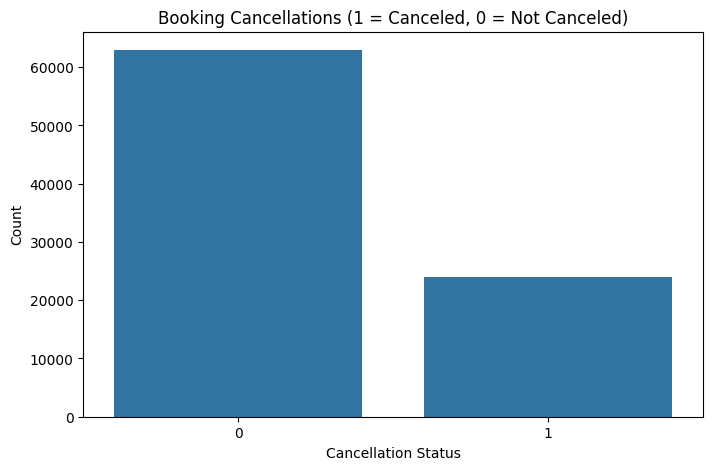

In [39]:
# Count of canceled bookings

plt.figure(figsize=(8,5))
sns.countplot(x='is_canceled', data=df)
plt.title('Booking Cancellations (1 = Canceled, 0 = Not Canceled)')
plt.xlabel('Cancellation Status')
plt.ylabel('Count')
plt.show()

 #### Lead Time Analysis:

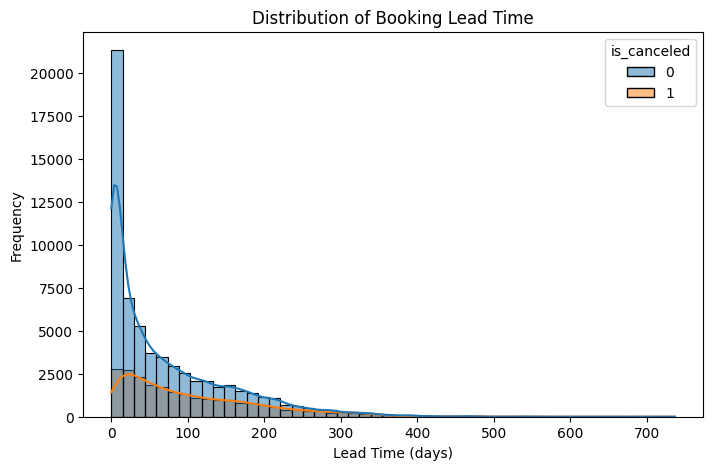

In [41]:
# Check distribution of lead_time

plt.figure(figsize=(8,5))
sns.histplot(x='lead_time', data=df, bins=50, kde=True, hue='is_canceled')
plt.title('Distribution of Booking Lead Time')
plt.xlabel('Lead Time (days)')
plt.ylabel('Frequency')
plt.show()

#### Weekend night stays Vr. Week night stays

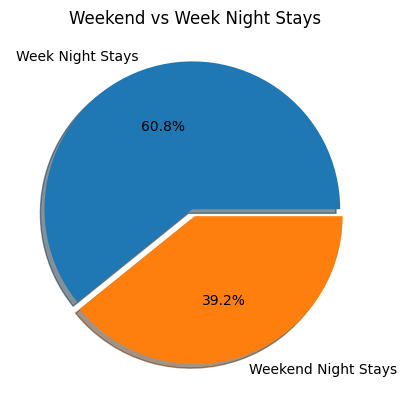

In [42]:
stays_in_week_night = df.groupby('stays_in_week_nights').size()
count_stays_in_week_nights = stays_in_week_night[1:].sum()


stays_in_weekend_night = df.groupby('stays_in_weekend_nights').size()
count_stays_in_weekend_nights = stays_in_weekend_night[1:].sum()

count_stays_in_week_nights
# count_stays_in_weekend_nights
l = [count_stays_in_week_nights, count_stays_in_weekend_nights]
label = ['Week Night Stays', 'Weekend Night Stays']
ex = [0.05, 0.0]

plt.pie(l, labels=label, explode=ex, shadow=True, autopct='%0.1f%%')
plt.title('Weekend vs Week Night Stays')
plt.show()

#### Booking Trends by Month:

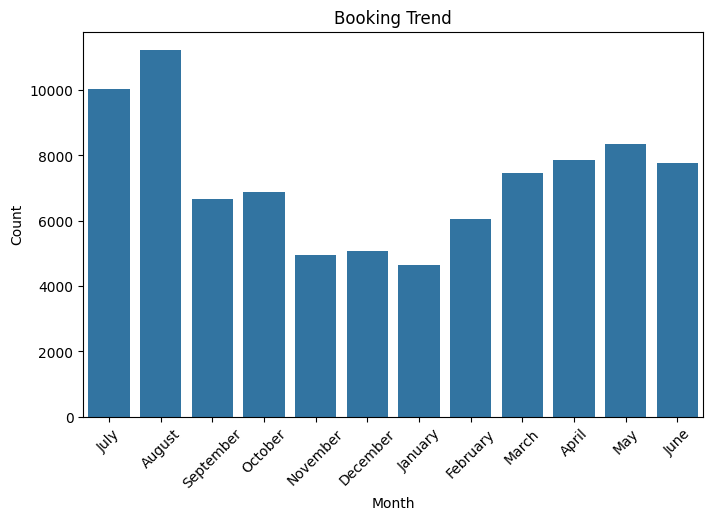

In [52]:
# Plot bookings trends by month

plt.figure(figsize=(8,5))
sns.countplot(x='arrival_date_month', data=df)
plt.xticks(rotation=45)
plt.title('Booking Trend')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

##### Customer Segmentation

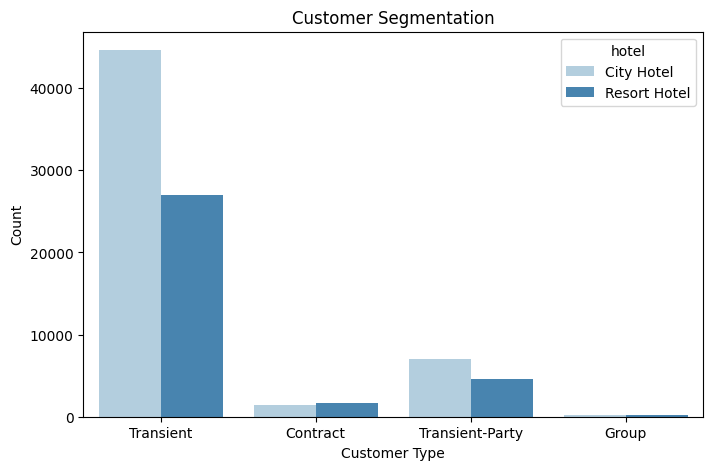

In [55]:
# Plot booking by customer type

plt.figure(figsize=(8,5))
sns.countplot(x='customer_type', data=df, hue='hotel', palette='Blues')
plt.title('Customer Segmentation')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.show()

#### Cancellation by Market Segment:

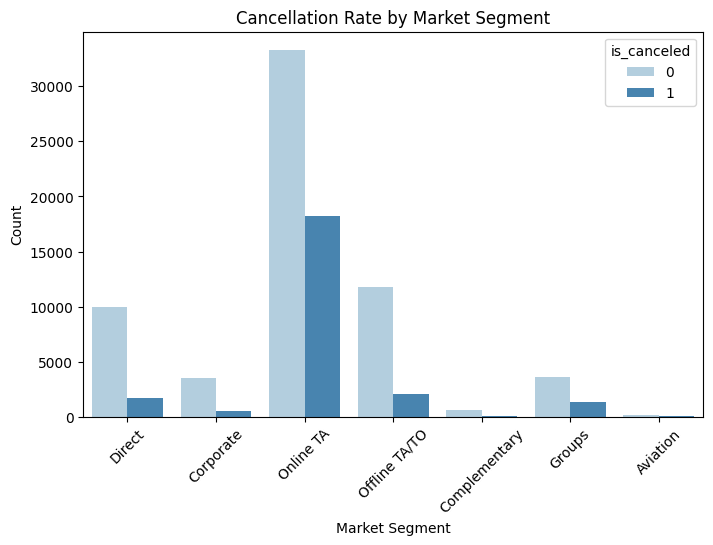

In [54]:
# Plot cancellation rate by market segment
plt.figure(figsize=(8,5))
sns.countplot(x='market_segment', hue='is_canceled', data=df, palette='Blues')
plt.xticks(rotation=45)
plt.title('Cancellation Rate by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Count')
plt.show()

#### Special Requests Analysis:

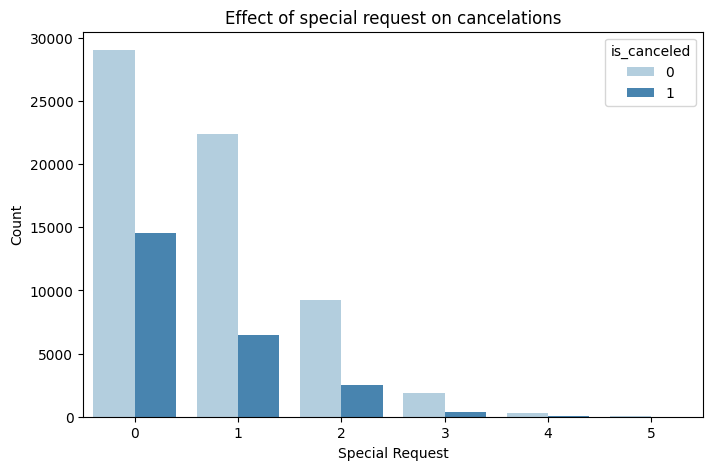

In [56]:
plt.figure(figsize=(8,5))
sns.countplot(x='total_of_special_requests', data=df, hue='is_canceled', palette='Blues')
plt.title('Effect of special request on cancelations')
plt.xlabel('Special Request')
plt.ylabel('Count')
plt.show()

##### Booking canceled with/without special request

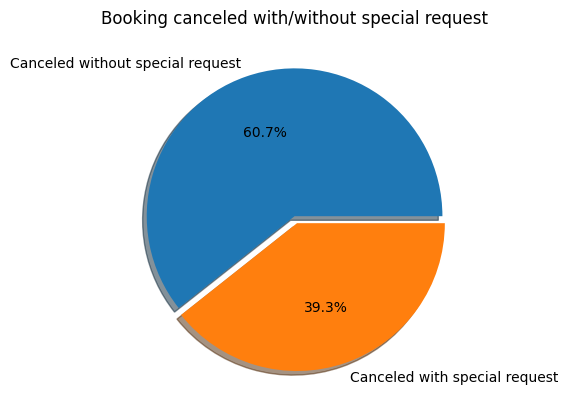

In [57]:
# Calculate percengate of canceled bookings which have/haven't special request

bookings_canceled = df[df['is_canceled'] != 0]

special_request= bookings_canceled.groupby('total_of_special_requests').size()

canceled_booking_count_with_special_request = special_request[1:].sum()
canceled_booking_count_without_special_request = count_of_special_request = special_request[0]

# Plot the canceled bookings with have/haven't special request
ex = [0.0, 0.05]
labels = ['Canceled without special request', 'Canceled with special request']
plt.pie([canceled_booking_count_without_special_request, canceled_booking_count_with_special_request], explode=ex, labels=labels, autopct='%0.1f%%', shadow=True)
plt.title('Booking canceled with/without special request')
plt.show()

####  Average Daily Rate (ADR):

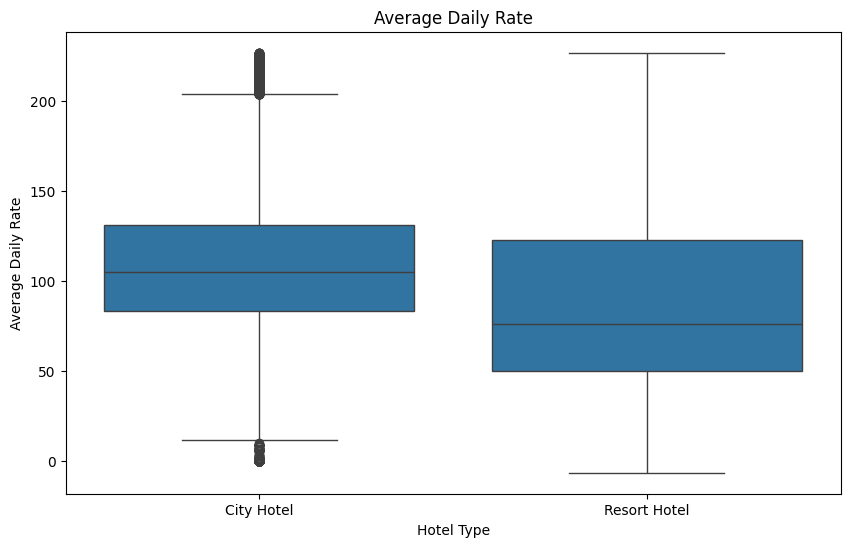

In [59]:
# Note : As there are some outlier, we'll trim them and plot it again to understand the average ADR

# Calculate the 25th and 75th percentile :
percentile25 = df['adr'].quantile(0.25)
percentile75 = df['adr'].quantile(0.75)

# Calculate the ADR :
iqr = percentile75 - percentile25

# Calculate upper and lower limit :
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

# Trim outliers and store value in new_df
new_df = df[df['adr'] < upper_limit]
new_df = new_df[new_df['adr'] > lower_limit]

# Plot the ADR by hotel withour outliers:

plt.figure(figsize=(10,6))
sns.boxplot(x='hotel', y='adr', data=new_df)

plt.title("Average Daily Rate")
plt.xlabel("Hotel Type")
plt.ylabel("Average Daily Rate")
plt.show()

## ***5. Solution to Business Objective***

## ***Conclusion***

In [268]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,0,No Deposit,303.0,0,Transient,103.00,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,0,No Deposit,240.0,0,Transient,82.00,0,1,Canceled,2015-05-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07
